# Telco Churn Prediction

### Objective: 
Identify factors that contribute to customer churn and build a predictive model to anticipate which customers are likely to leave the teleco.

### Target Variable: 
In the dataset, the churn column is handily labeled for us. This column will be used as the y variable that we predict with the model.

### Index:
- Loading libraries and data
- Data Exploration
- Data Cleaning
- Feature engineering
- Data Visualization
- Data Preprocessing

#### Machine Learning Model Evaluations and Predictions
- Random Forest
- Logistic Regression
- Gradient Boosting Classifier


## Questions To Answer
- Is there a difference in churn rate based on gender?
- Are certain products better/worse for churn rates?
- How much impact does billing type have?
- Is there a tenure after which churn becomes much less likely?

Any other questions that arise as we go through the data

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [136]:
df = pd.read_csv("/workspace/customer-conversion-drivers/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data Exploration


In [137]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Display the DataFrame
print(df.head())

# Optionally reset options if you want to revert back to default settings
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [138]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [140]:
df.shape


(7043, 21)

We can see that certain columns don't seem to be in the correct format, for example TotalCharges and MonthlyCharges should both be numeric

In [141]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
## Creating a list of numeric columns
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
numeric_cols


['MonthlyCharges', 'TotalCharges', 'tenure']

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that after converting to numeric and Nulling rows that couldn't be converted, we now have 11 NULL rows in TotalCharges

These missing rows are now filled with the mean value

In [143]:
df.fillna(df["TotalCharges"].mean())
df.drop(columns=['customerID'], inplace = True)

Checking for dupes

In [144]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')


Duplicate rows: 22


Checking for outliers

In [145]:
# Calculate IQR
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [146]:
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: -46.02499999999999
Upper bound: 171.375


In [147]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

## Data cleaning

Cleaning Up MultipleLines column

In [148]:
df['MultipleLines'] =  df['MultipleLines'].apply(lambda x: True if x == 'Yes' else False)

Cleaning columns so that the relevant columns are Bools rather than objects

In [149]:
binary_int_columns = ['SeniorCitizen']

# Convert 0/1 columns to bool
df[binary_int_columns] = df[binary_int_columns].astype(bool)

In [150]:
# Convert "yes"/"no" to bool
obj_columns = ['Churn','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

def map_to_boolean(value):
    if value == 'Yes':
        return True
    elif value == 'No':
        return False
    else:  # To Handle 'No Service' and any other unexpected values
        return False

for col in obj_columns:
    df[col] = df[col].apply(map_to_boolean)

One Hot encoding

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   bool   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   bool   
 6   MultipleLines     7043 non-null   bool   
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   bool   
 9   OnlineBackup      7043 non-null   bool   
 10  DeviceProtection  7043 non-null   bool   
 11  TechSupport       7043 non-null   bool   
 12  StreamingTV       7043 non-null   bool   
 13  StreamingMovies   7043 non-null   bool   
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   bool   
 16  PaymentMethod     7043 non-null   object 


In [152]:
# One hot encoding
df = pd.get_dummies(df, columns=['gender','InternetService','Contract','PaperlessBilling','PaymentMethod'])

We are left with either bool or int columns and no nulls

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   bool   
 1   Partner                                  7043 non-null   bool   
 2   Dependents                               7043 non-null   bool   
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   bool   
 5   MultipleLines                            7043 non-null   bool   
 6   OnlineSecurity                           7043 non-null   bool   
 7   OnlineBackup                             7043 non-null   bool   
 8   DeviceProtection                         7043 non-null   bool   
 9   TechSupport                              7043 non-null   bool   
 10  StreamingTV                              7043 no

# Feature Engineering

# Data Visualisation

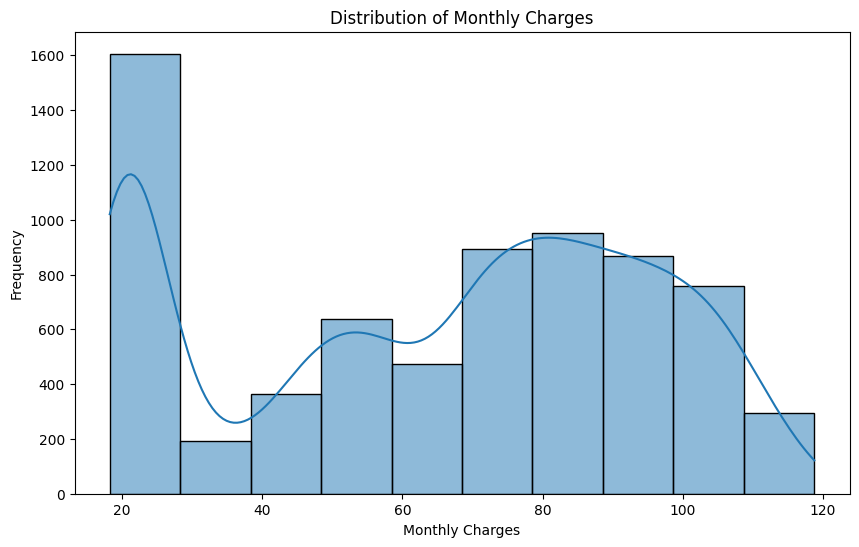

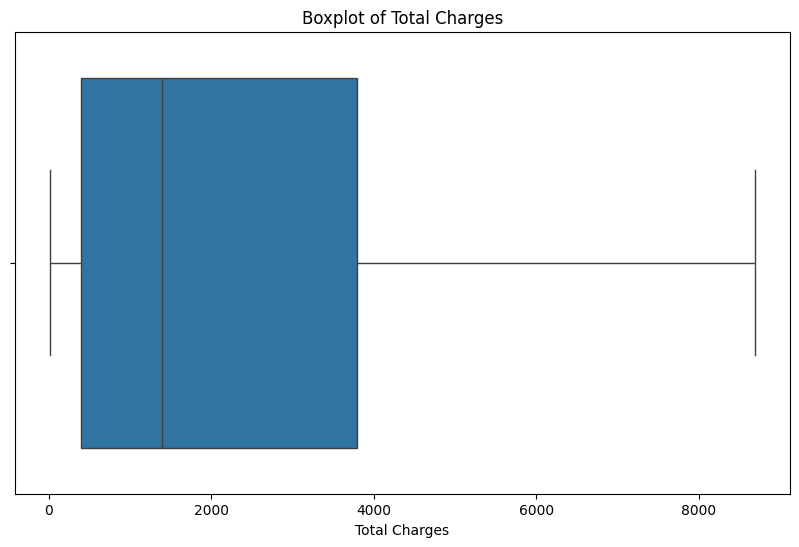

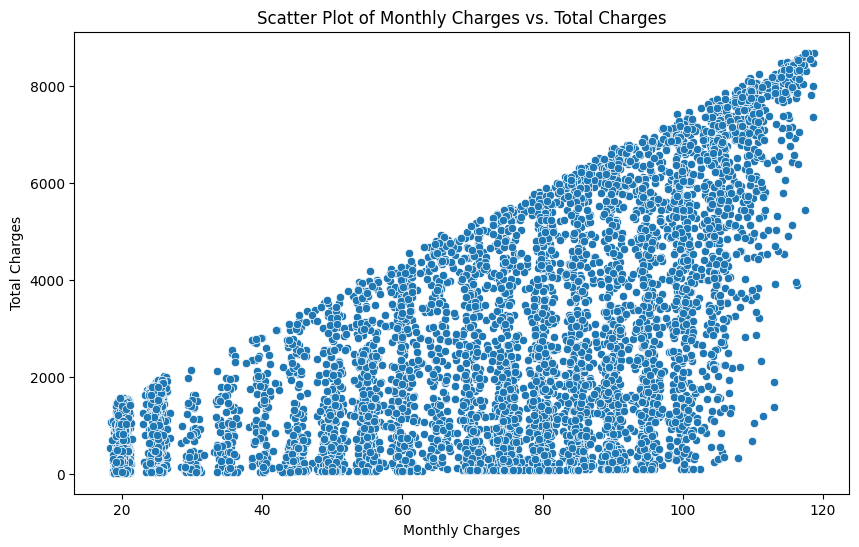

In [154]:
# 1. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=10, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

# 3. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Scatter Plot of Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

In [164]:
correlation_matrix = df.corr()['Churn'].sort_values(ascending = False)
correlation_matrix = correlation_matrix.drop('Churn')

/tmp/ipykernel_10321/360276097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette='coolwarm')


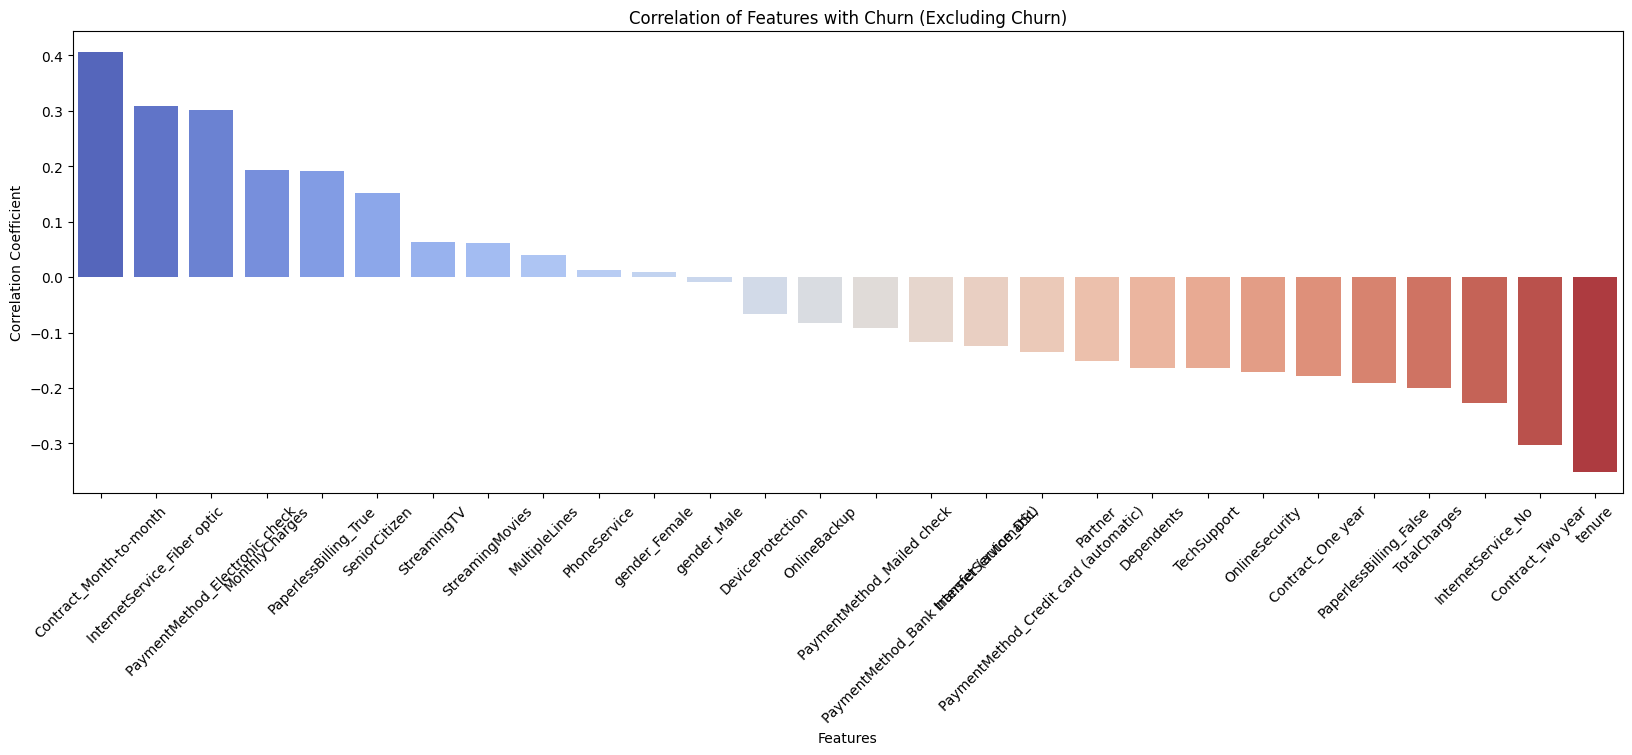

In [170]:
plt.figure(figsize=(20, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette='coolwarm')
plt.title('Correlation of Features with Churn (Excluding Churn)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)  
plt.show()

# Data Preprocessing

In [171]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Modelling and Predictions

Model training

In [172]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:55:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Model predictions

In [173]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:56:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [179]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
conf_matrix

Accuracy: 0.80
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1036
        True       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:


array([[933, 103],
       [178, 195]])

Looking at Feature Importance

/tmp/ipykernel_10321/3891525144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


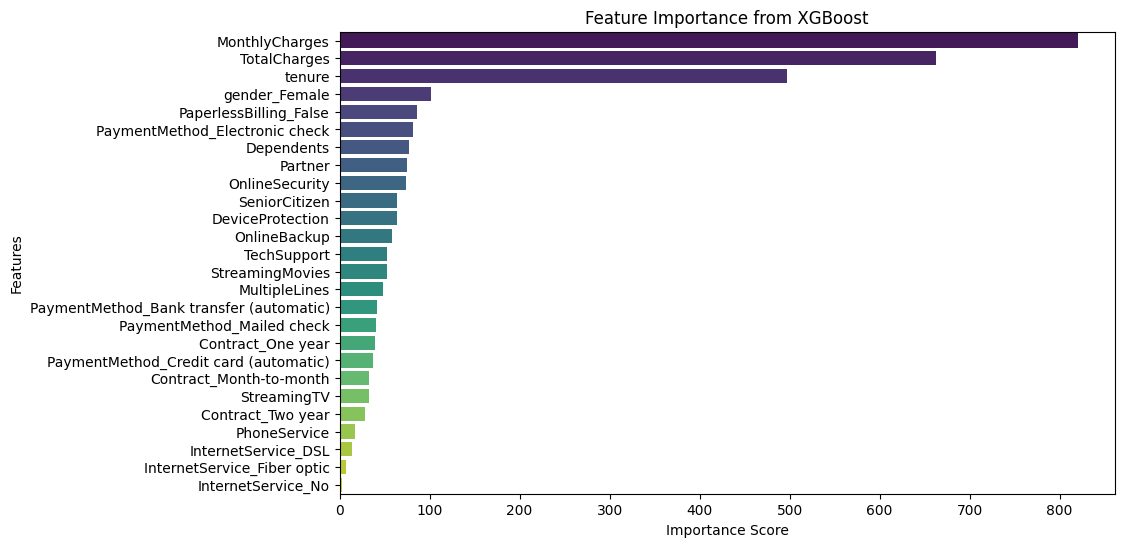

In [180]:
# Feature importants
importance = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Hyperparam tuning

In [181]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWar

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross Validation

In [182]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model_cv = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform cross-validation
cv_scores = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:59:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:59:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:59:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWar

Cross-Validation Scores: [0.77501774 0.78850248 0.77004968 0.78622159 0.79758523]
Mean CV Score: 0.7834753451835603


/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:59:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [183]:
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [184]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.77501774 0.78850248 0.77004968 0.78622159 0.79758523]
Mean CV Score: 0.7834753451835603


In [185]:
# Best parameters from GridSearchCV
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.8
}

# Initialize the model with the best parameters
model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1036
        True       0.69      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
[[940  96]
 [159 214]]


/home/vscode/.cache/pypoetry/virtualenvs/customer-conversion-drivers-SZXFcCna-py3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [20:03:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
